In [44]:
import matplotlib.pyplot as plt
from pathlib import Path

In [45]:
# Load the data
data_dir = Path('~/generated_outputs').expanduser()
# grab each subdirectory
subdirs = [x for x in data_dir.iterdir() if x.is_dir()]
subdirs

[PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_number_theory'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_intermediate_algebra'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_algebra'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_geometry'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_precalculus'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_counting_and_probability'),
 PosixPath('/lfs/skampere1/0/kaif/generated_outputs/EleutherAI_hendrycks_math_prealgebra')]

In [46]:
# extract dataset name from subdir
def format_dataset_name(subdir):
    return subdir.name.replace('EleutherAI_hendrycks_math', 'Hendrycks').replace('_', ' ').title()

dataset_names = [format_dataset_name(x) for x in subdirs]
dataset_names

['Hendrycks Number Theory',
 'Hendrycks Intermediate Algebra',
 'Hendrycks Algebra',
 'Hendrycks Geometry',
 'Hendrycks Precalculus',
 'Hendrycks Counting And Probability',
 'Hendrycks Prealgebra']

In [47]:
# load the data
# in each subdir, there are 3 files for each model labeled like
# [model name]_grades.pkl
# [model name].pkl
# [model name]_ppl.pkl
# we want to load both grades and ppl files
import pickle
import numpy as np

def load_data(subdir):
    files = [x for x in subdir.iterdir() if x.is_file() and x.suffix == '.pkl']
    grades = {}
    ppl = {}
    for file in files:
        if file.stem.endswith('_grades'):
            with open(file, 'rb') as f:
                grades[file.stem.replace('_grades', '')] = pickle.load(f)
        elif file.stem.endswith('_ppl'):
            with open(file, 'rb') as f:
                ppl[file.stem.replace('_ppl', '')] = pickle.load(f)
    return {
        'grades': {k: np.mean(v) for k, v in grades.items()},
        'ppl': {k: np.mean(v) for k, v in ppl.items()}
    }

data = {dataset: load_data(subdir) for dataset, subdir in zip(dataset_names, subdirs)}

In [48]:
import pandas as pd

grades = {k: v['grades'] for k, v in data.items()}
ppl = {k: v['ppl'] for k, v in data.items()}

grades_df = pd.DataFrame(grades).melt(value_name='grade', var_name='dataset', ignore_index=False).reset_index()
ppl_df = pd.DataFrame(ppl).melt(value_name='ppl', var_name='dataset', ignore_index=False).reset_index()
grades_df = grades_df.rename(columns={'index': 'model'})
ppl_df = ppl_df.rename(columns={'index': 'model'})

In [49]:
# compute log grade and cross entropy
grades_df['Log Accuracy'] = np.log(grades_df['grade'])
ppl_df['Cross Entropy'] = np.log(ppl_df['ppl'])

In [50]:
grades_df

,model,dataset,grade,Log Accuracy
0,deepseek-ai_deepseek-math-7b-rl,Hendrycks Number Theory,0.188222,-1.670135
1,llm-agents_tora-13b-v1.0,Hendrycks Number Theory,0.227483,-1.480681
2,deepseek-ai_deepseek-math-7b-instruct,Hendrycks Number Theory,0.336028,-1.090562
3,EleutherAI_llemma_7b,Hendrycks Number Theory,0.050808,-2.979695
4,deepseek-ai_deepseek-math-7b-rl,Hendrycks Intermediate Algebra,0.120743,-2.114091
5,llm-agents_tora-13b-v1.0,Hendrycks Intermediate Algebra,0.095201,-2.351762
6,deepseek-ai_deepseek-math-7b-instruct,Hendrycks Intermediate Algebra,0.202786,-1.595602
7,EleutherAI_llemma_7b,Hendrycks Intermediate Algebra,0.036378,-3.313799
8,deepseek-ai_deepseek-math-7b-rl,Hendrycks Algebra,0.334865,-1.094028
9,llm-agents_tora-13b-v1.0,Hendrycks Algebra,0.271683,-1.303120


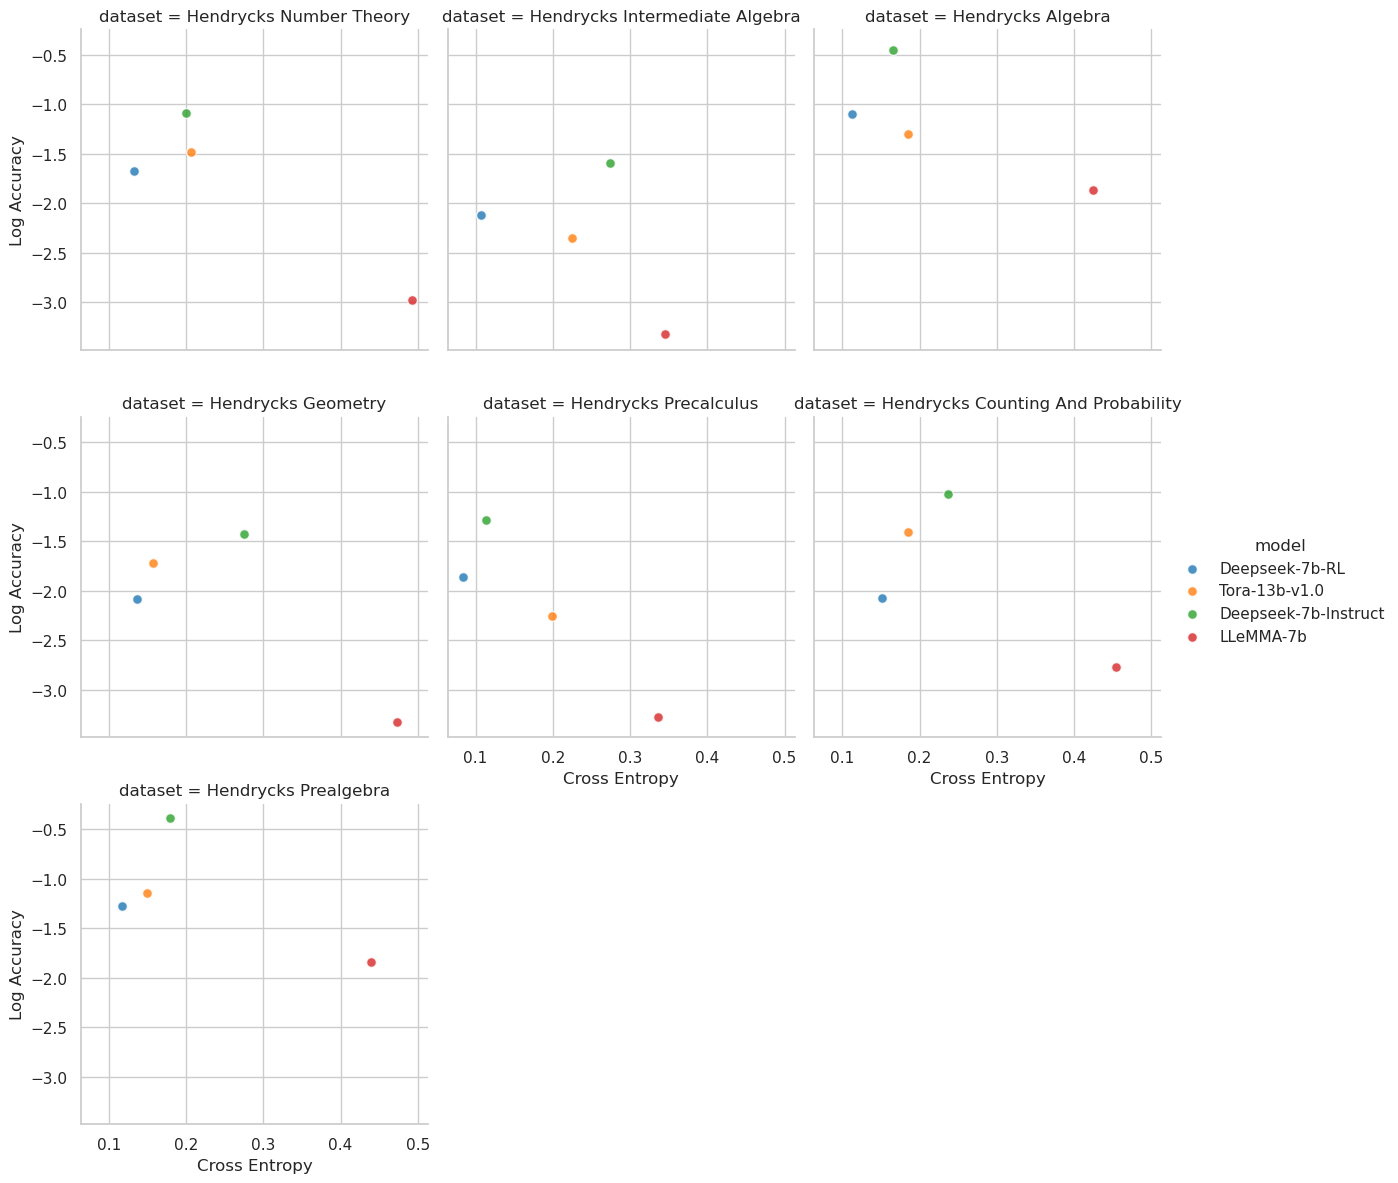

In [72]:
# plot grades against ppl
# dataset should be ignored and model represented by color
# x axis should be ppl and y axis should be grades

# merge the two dataframes
df = pd.merge(grades_df, ppl_df, on=['dataset', 'model'])

# rename models
model2name = {
    'deepseek-ai_deepseek-math-7b-rl': 'Deepseek-7b-RL',
    'deepseek-ai_deepseek-math-7b-instruct': 'Deepseek-7b-Instruct',
    'llm-agents_tora-13b-v1.0': 'Tora-13b-v1.0',
    'EleutherAI_llemma_7b': 'LLeMMA-7b',
}
df['model'] = df['model'].map(model2name)

# plot
import seaborn as sns
sns.set_theme(style="whitegrid")

# logx and logy scales

g = sns.lmplot(
    data=df,
    x='Cross Entropy',
    y='Log Accuracy',
    hue='model',
    col='dataset',
    col_wrap=3,
    height=4,
    aspect=1,
    scatter_kws=dict(s=50, linewidths=1, edgecolor='w'),
    palette='tab10',
)
# g.set(xscale="log", yscale="log")

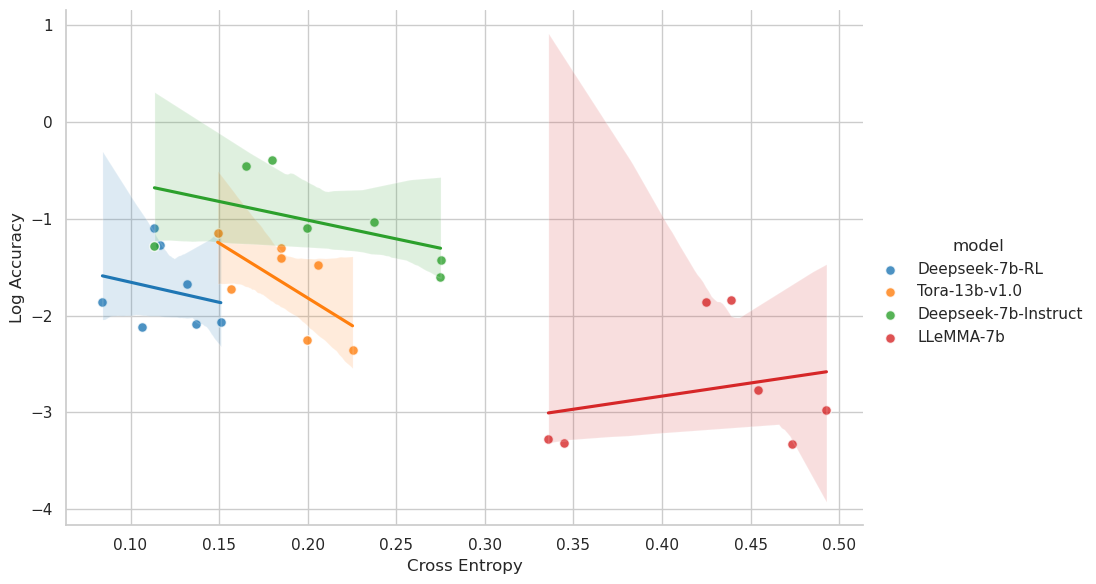

In [74]:
# ignore dataset when plotting
g = sns.lmplot(
    data=df,
    x='Cross Entropy',
    y='Log Accuracy',
    hue='model',
    height=6,
    aspect=1.5,
    scatter_kws=dict(s=50, linewidths=1, edgecolor='w'),
    palette='tab10',
)
# g.set(xscale="log", yscale="log")

In [68]:
# compute R^2
df.groupby('model').apply(lambda x: x[['Cross Entropy', 'Log Accuracy']].corr().iloc[0, 1]**2)

model
EleutherAI_llemma_7b                     0.063148
deepseek-ai_deepseek-math-7b-instruct    0.248422
deepseek-ai_deepseek-math-7b-rl          0.049166
llm-agents_tora-13b-v1.0                 0.422618
dtype: float64

In [70]:
??LinearRegression.score

In [67]:
# compute R^2
from sklearn.linear_model import LinearRegression

R2 = df.groupby('model').apply(lambda x: LinearRegression().fit(x[['Cross Entropy']], x[['Log Accuracy']]).score(x[['Cross Entropy']], x[['Log Accuracy']]))
R2

model
EleutherAI_llemma_7b                     0.063148
deepseek-ai_deepseek-math-7b-instruct    0.248422
deepseek-ai_deepseek-math-7b-rl          0.049166
llm-agents_tora-13b-v1.0                 0.422618
dtype: float64

In [58]:
# compute correlation between log accuracy and cross entropy
correlation = df.groupby('model').apply(lambda x: x[['Log Accuracy', 'Cross Entropy']].corr().iloc[0, 1])
correlation

model
EleutherAI_llemma_7b                     0.251294
deepseek-ai_deepseek-math-7b-instruct   -0.498419
deepseek-ai_deepseek-math-7b-rl         -0.221735
llm-agents_tora-13b-v1.0                -0.650091
dtype: float64

In [57]:
# compute correlation between grade and ppl
correlation = df.groupby('model').apply(lambda x: x[['grade', 'ppl']].corr().iloc[0, 1])
correlation

model
EleutherAI_llemma_7b                     0.165939
deepseek-ai_deepseek-math-7b-instruct   -0.471243
deepseek-ai_deepseek-math-7b-rl         -0.209154
llm-agents_tora-13b-v1.0                -0.646765
dtype: float64

In [59]:
# estimate the variance of the sample correlation
# using the Fisher transformation
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Testing_using_Statistical_Packages
n = df.groupby('model').apply(lambda x: x.shape[0])
variance = (1 - correlation**2)**2 / (n - 3)
variance

model
EleutherAI_llemma_7b                     0.219423
deepseek-ai_deepseek-math-7b-instruct    0.141217
deepseek-ai_deepseek-math-7b-rl          0.226021
llm-agents_tora-13b-v1.0                 0.083342
dtype: float64

In [60]:
# estimate it using the bootstrap
from sklearn.utils import resample
from scipy.stats import pearsonr

def bootstrap_correlation(df, model, n_bootstrap=1000):
    # get the data for the model
    model_data = df[df['model'] == model]
    # bootstrap
    bootstrap_correlations = []
    for _ in range(n_bootstrap):
        resampled_data = resample(model_data)
        correlation = pearsonr(resampled_data['ppl'], resampled_data['grade'])[0]
        bootstrap_correlations.append(correlation)
    return np.var(bootstrap_correlations)

bootstrap_variance = {model: bootstrap_correlation(df, model) for model in df['model'].unique()}
bootstrap_variance

{'deepseek-ai_deepseek-math-7b-rl': 0.12886908687674384,
 'llm-agents_tora-13b-v1.0': 0.1031636771895701,
 'deepseek-ai_deepseek-math-7b-instruct': 0.12588543309812486,
 'EleutherAI_llemma_7b': 0.16541550574182823}